<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter6/Change-Points_Anomalies.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection

In [ ]:
#!pip install alibi_detect

In [1]:
from alibi_detect.datasets import fetch_kdd

intrusions = fetch_kdd()

intrusions is a dictionary with 4 keys: 
- data: matrix of 492021x18 
- target: contains annotations of anomalies (shape (492021,))
- target_names: 'normal', 'outlier'
- feature_names: names of 18 features of data set- mostly error rates and counts

In [18]:
intrusions["target"].sum() / len(intrusions["target"]) #80% of data is not zero and contains anotation for anomlies 

0.8030893423558918

In [40]:
# which row is the anomaly present in?
# for i in range(len(intrusions['target'])):
#     print(intrusions['target'][intrusions['target'] != 0][i],i)


In [48]:
intrusions["feature_names"]

['srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

<Axes: >

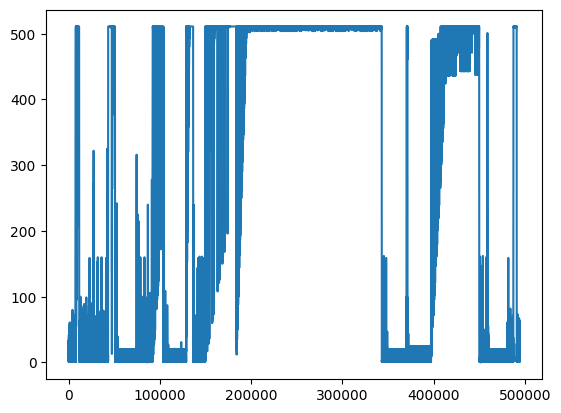

In [43]:
# plot of time series data 
import pandas as pd

pd.Series(intrusions["data"][:, 0]).plot()

SpectralResidual model (method proposed by Microsoft): 
- https://docs.seldon.io/projects/alibi-detect/en/latest/od/methods/sr.html
- algorithm first computes the Fourier Transform of the original data. Then it computes the spectral residual of the log amplitude of the transformed signal before applying the Inverse Fourier Transform to map the sequence back from the frequency to the time domain. This sequence is called the saliency map.

In [63]:

from alibi_detect.od import SpectralResidual

od = SpectralResidual(
    threshold=20, window_amp=20, window_local=20, n_est_points=10, n_grad_points=5
)
intrusion_outliers = od.predict(intrusions["data"][:,0])

In [64]:
#anolmaly scores for each point in the data
scores = od.score(intrusions["data"][:, 0])

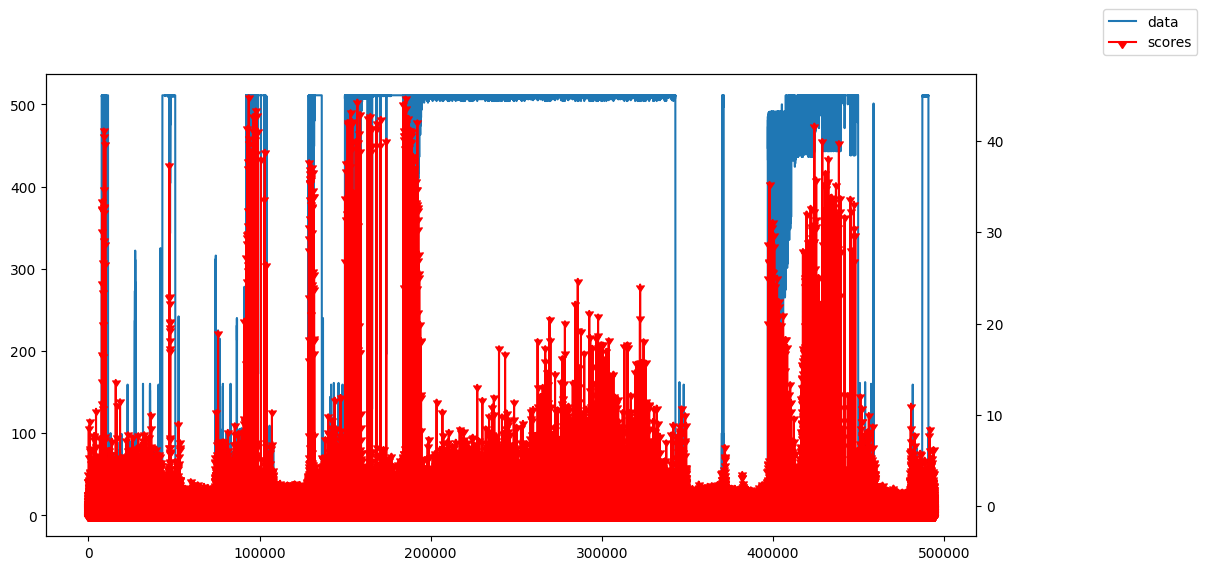

In [65]:
import matplotlib

ax = pd.Series(intrusions["data"][:, 0], name="data").plot(
    legend=False, figsize=(12, 6)
)
ax2 = ax.twinx()
ax = pd.Series(scores, name="scores").plot(
    ax=ax2, legend=False, color="r", marker=matplotlib.markers.CARETDOWNBASE
)
ax.figure.legend(bbox_to_anchor=(1, 1), loc="upper left")

# Change point detection

In [ ]:
#!pip install ruptures

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt

plt.style.use("seaborn-whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [ ]:
signal, bkps = rpt.pw_constant(
    n_samples=500, n_features=3, n_bkps=2, noise_std=5.0, delta=(1, 20)
)

In [ ]:
rpt.display(signal, bkps)

In [ ]:
signal.shape

In [ ]:
bkps

In [ ]:
# "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model="l1").fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))